In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import numpy as np
import statsmodels.tsa.api as smt

In [3]:
df = pd.read_csv(os.path.join("data","Monthly beer production in Australia megalitres Includes ale and stout.csv"),index_col=0)

df.head()

,x
1,93.2
2,96.0
3,95.2
4,77.1
5,70.9


In [4]:
df.describe()

,x
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


Text(0.5, 1.0, 'Количество произведенного пива в Австралии по месяцам')

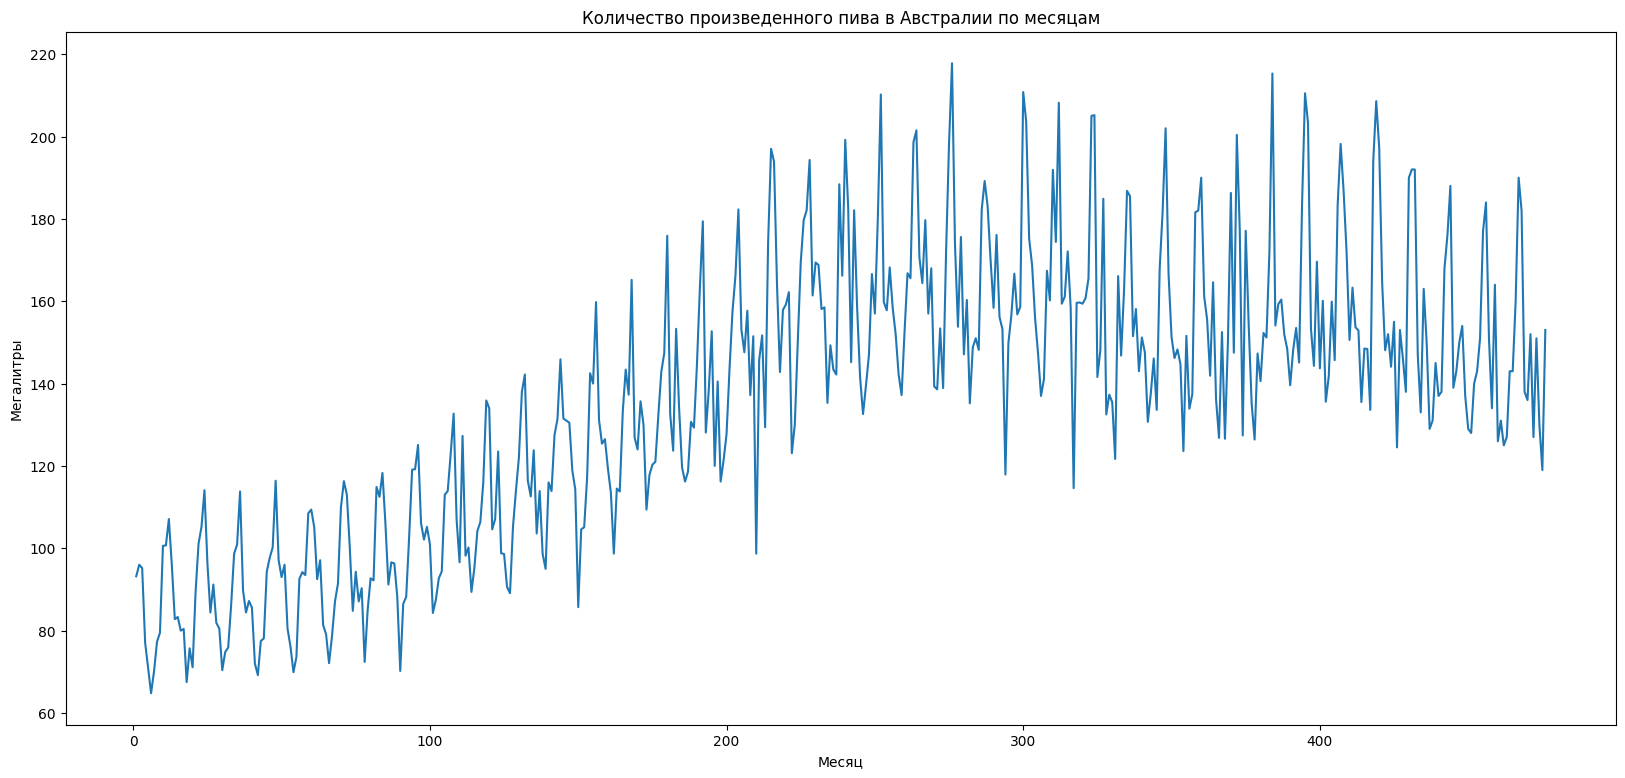

In [5]:
plt.figure(figsize=(20,9))
plt.plot(df)
plt.xlabel("Месяц")
plt.ylabel("Мегалитры")
plt.title("Количество произведенного пива в Австралии по месяцам")

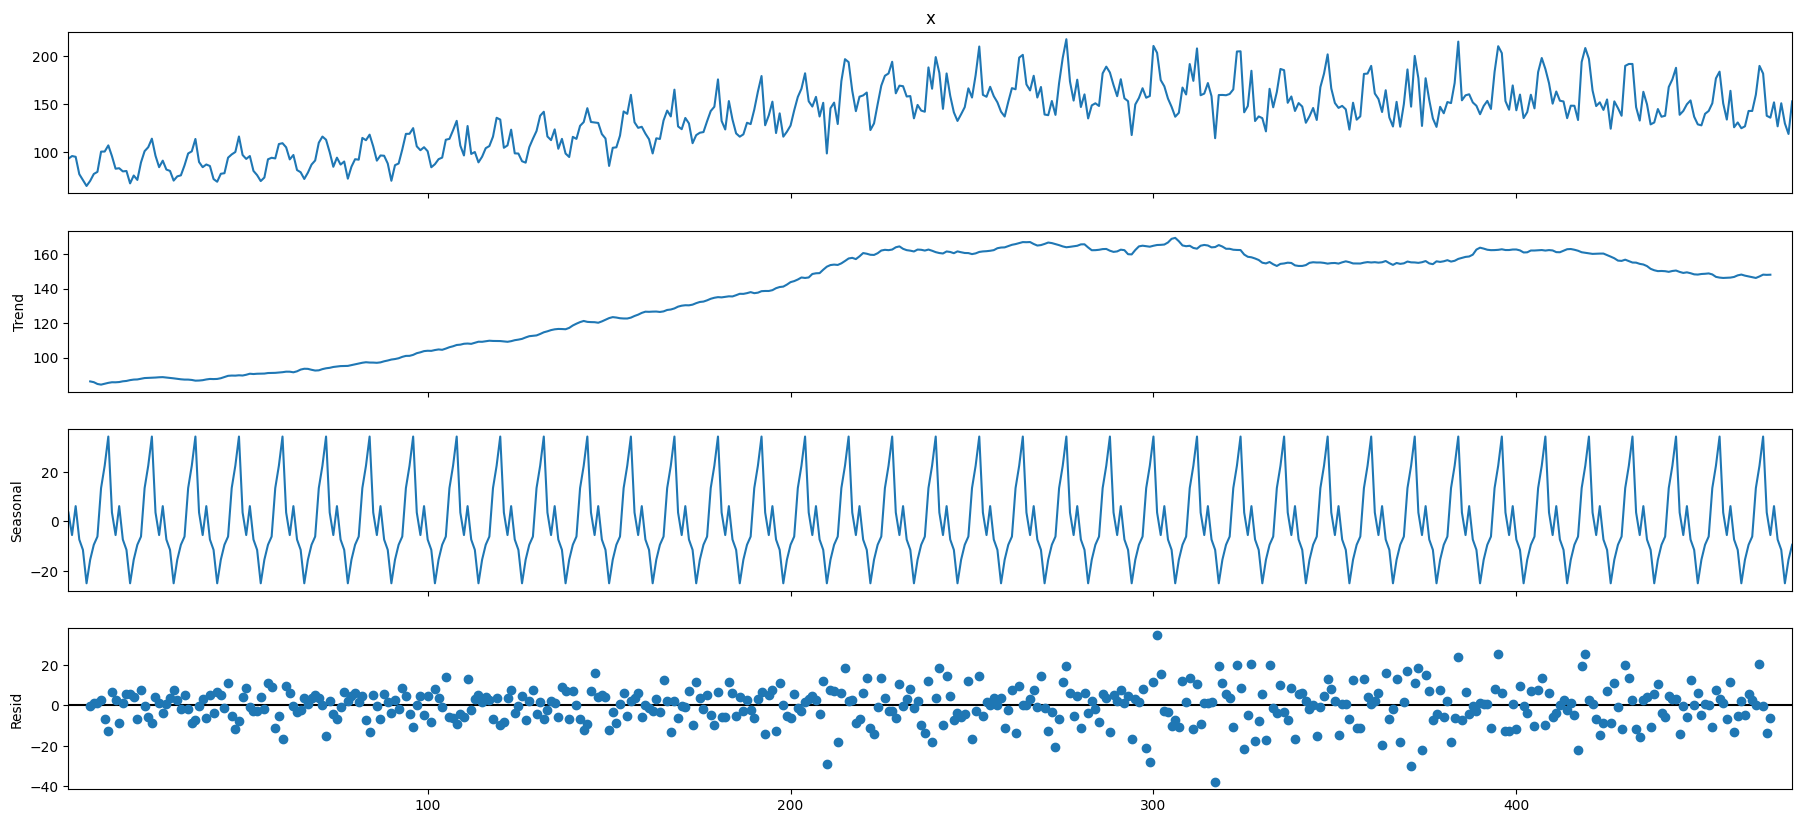

In [6]:
#Задание 1 
#Разложить по компонентам

#Разложение в аддитивный ряд

decompose_add = seasonal_decompose(df["x"],model="additive",period=12)

fig = decompose_add.plot()
fig.set_figheight(9)
fig.set_figwidth(20)
plt.show()

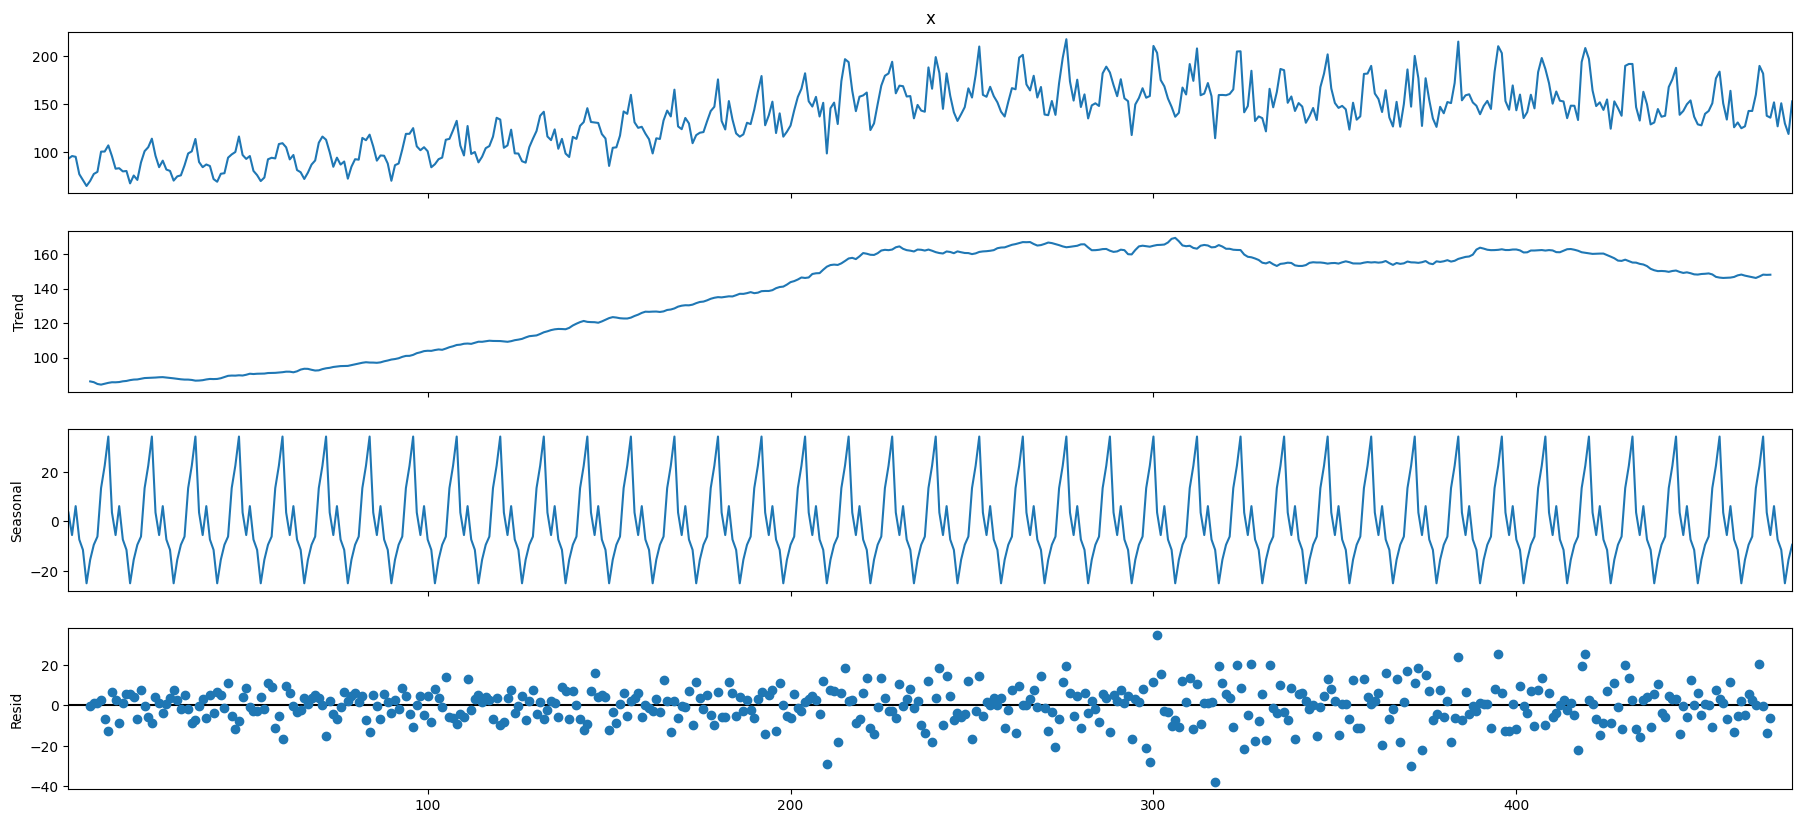

In [7]:
#Разложение в мультипликативный ряд

decompose_mul = seasonal_decompose(df["x"],model="multiplicative",period=12)

fig = decompose_add.plot()
fig.set_figheight(9)
fig.set_figwidth(20)
plt.show()

In [8]:
#Задание 2

#Проверка ряда на стационарность

alpha = 0.05
name = "Производство пива"
ts = df["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Производство пива :
Test Statistic                  -2.282661
p-value                          0.177621
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical Value (1%)             -3.444709
Critical Value (5%)             -2.867871
Critical Value (10%)            -2.570142
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


Text(0.5, 1.0, 'Собранный аддитивный ряд количества произведенного пива в Австралии по месяцам')

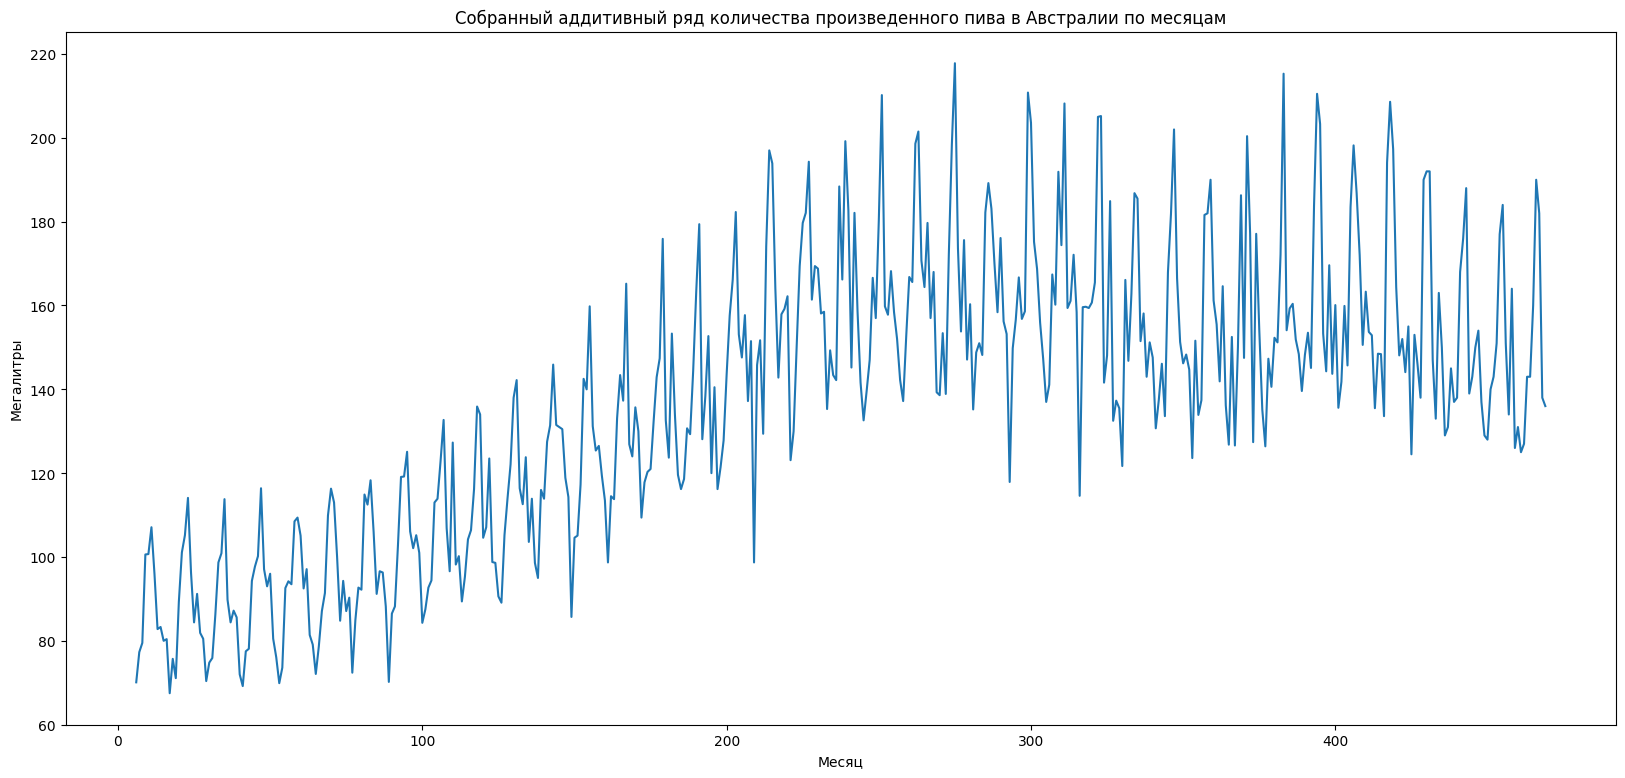

In [9]:
#Задание 3

#Сбор аддитивного ряда

add_series = decompose_add.trend + decompose_add.seasonal + decompose_add.resid

plt.figure(figsize=(20,9))
plt.plot(np.arange(len(add_series)),add_series)
plt.xlabel("Месяц")
plt.ylabel("Мегалитры")
plt.title("Собранный аддитивный ряд количества произведенного пива в Австралии по месяцам")

Text(0.5, 1.0, 'Собранный мультипликативный ряд количества произведенного пива в Австралии по месяцам')

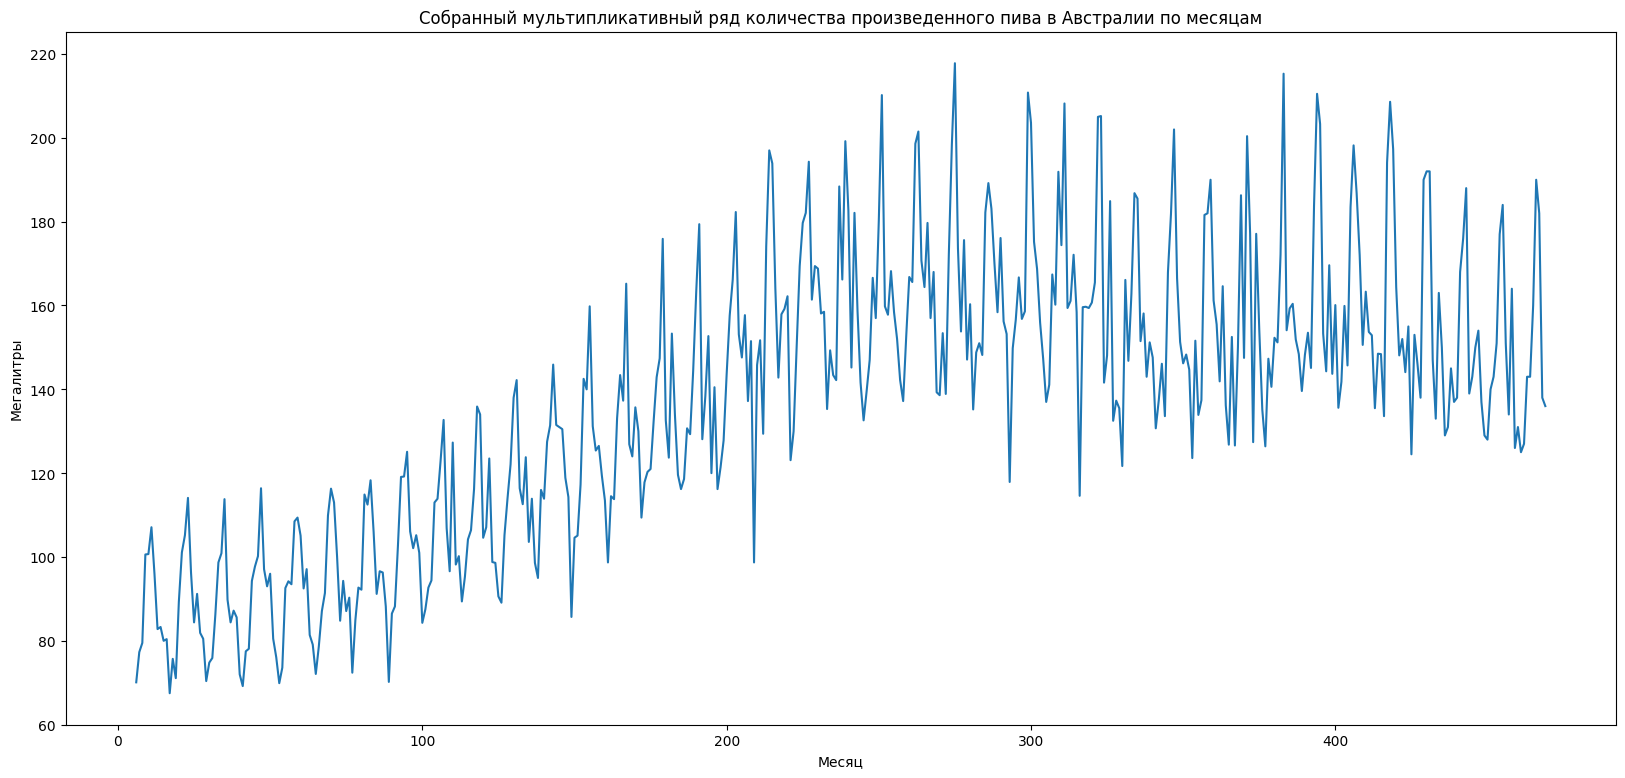

In [10]:
#Задание 4

#Сбор мультипликативного ряда

mul_series = decompose_mul.trend * decompose_mul.seasonal * decompose_mul.resid

plt.figure(figsize=(20,9))
plt.plot(np.arange(len(mul_series)),mul_series)
plt.xlabel("Месяц")
plt.ylabel("Мегалитры")
plt.title("Собранный мультипликативный ряд количества произведенного пива в Австралии по месяцам")

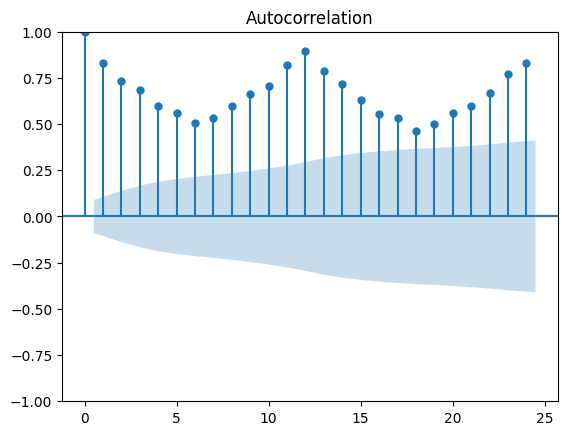

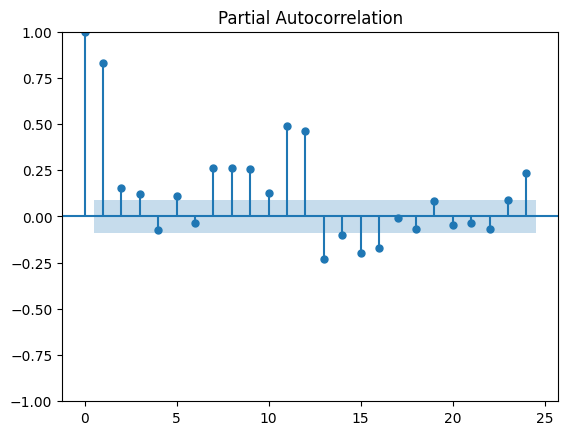

In [12]:
#Задание 5

#Построение автокореляции и коррелограмма

ts = df["x"]

A = smt.graphics.plot_acf(ts,lags=24)

B = smt.graphics.plot_pacf(ts,lags=24)